In [12]:
import random
import numpy as np
from scipy.interpolate import Rbf
import rbf
from rbf.interpolate import RBFInterpolant
from rbf.pde.nodes import disperse, poisson_disc_nodes
import matplotlib.pyplot as plt
from matplotlib import cm

local_seed = 13
local_random = random.Random()
local_random.seed(local_seed)


def rotate2d(theta):
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    return R

In [ ]:
arena_dimension = 100
vert = np.array([[-arena_dimension,-arena_dimension],[-arena_dimension,arena_dimension],
                    [arena_dimension,arena_dimension],[arena_dimension,-arena_dimension]])
smp = np.array([[0,1],[1,2],[2,3],[3,0]])


In [13]:
peak_rate = 20.
nmodules = 10

field_width_params = [35.0, 0.32]
field_width        = lambda x: 40. + field_width_params[0] * (np.exp(x / field_width_params[1]) - 1.)

module_grid_orientation   = [local_random.uniform(0, np.pi/3.) for i in xrange(nmodules)]
module_grid_spacing       = [field_width( float(i) / float(nmodules) ) for i in xrange(nmodules)]


In [19]:
grid_spacing     = module_grid_spacing[0]
grid_orientation = module_grid_orientation[0]

print('grid spacing: %.02f' % grid_spacing)
print('grid orientation: %.02f' % grid_orientation)



grid spacing: 40.00
grid orientation: 0.27


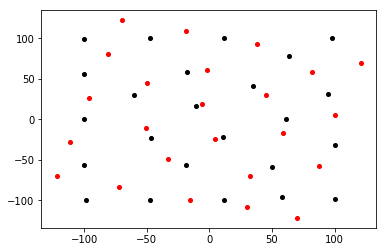

In [20]:
nodes, groups, _ = poisson_disc_nodes(float(grid_spacing), (vert, smp), iterations=25, snap_delta=0.1)

rot = rotate2d(-grid_orientation)
rnodes = np.dot(rot, nodes.T).T

fig, ax = plt.subplots()
ax.plot(nodes[:, 0], nodes[:, 1], 'ko', markersize=4)
ax.plot(rnodes[:, 0], rnodes[:, 1], 'ro', markersize=4)

(24,)
(200, 200)
(200, 200)
(200, 200)
0.012587657643713784
20.20177273421069


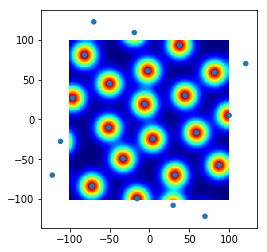

In [17]:

x_obs = rnodes
u_obs = peak_rate * np.ones(len(x_obs))
print u_obs.shape

ip2  = Rbf(x_obs[:,0], x_obs[:,1], u_obs, function='gaussian', smooth=(-0.1)**2, epsilon=grid_spacing/2.71828)

arena_x = np.arange(-100, 100, 1)
arena_y = np.arange(-100, 100, 1)

xx, yy = np.meshgrid(arena_x, arena_y, indexing='ij')
zz2 = ip2(xx, yy)
print xx.shape
print yy.shape
print zz2.shape
print np.min(zz2.ravel())
print np.max(zz2.ravel())
plt.pcolor(xx, yy, zz2,cmap=cm.jet)
plt.scatter(x_obs[:,0], x_obs[:,1], u_obs, cmap=cm.jet)
ax = plt.gca()
ax.set_aspect('equal')

(24,)


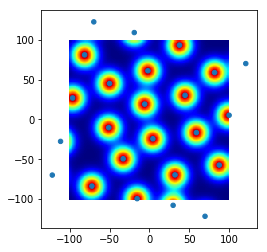

In [18]:
x_obs = rnodes
u_obs = peak_rate * np.ones(len(x_obs))
print u_obs.shape

from rbf.basis import *
r = get_r()
eps = get_eps()
ga_expr = sympy.exp(-(r/eps)**2)
ga = RBF(ga_expr)

ip1  = RBFInterpolant(x_obs, u_obs, sigma=0.1, phi=ga, eps=grid_spacing/2.71828, order=-1)

arena_x = np.arange(-100, 100, 1)
arena_y = np.arange(-100, 100, 1)

xx, yy = np.meshgrid(arena_x, arena_y)
coords = np.column_stack((xx.ravel(), yy.ravel()))
zz1 = ip1(coords)

plt.pcolor(xx, yy, zz1.reshape(xx.shape), cmap=cm.jet)
plt.scatter(x_obs[:,0], x_obs[:,1], u_obs, cmap=cm.jet)
ax = plt.gca()
ax.set_aspect('equal')

In [29]:
grid_spacing     = module_grid_spacing[2]
grid_orientation = module_grid_orientation[2]
print('grid spacing: %.02f' % grid_spacing)
print('grid orientation: %.02f' % grid_orientation)


grid spacing: 70.39
grid orientation: 0.72


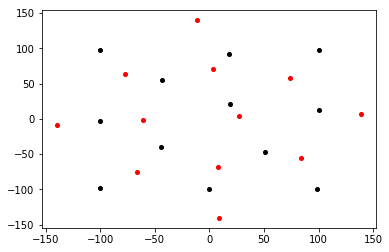

In [30]:
nodes, groups, _ = poisson_disc_nodes(float(grid_spacing), (vert, smp), iterations=50, snap_delta=0.1)

rot = rotate2d(-grid_orientation)
rnodes = np.dot(rot, nodes.T).T

fig, ax = plt.subplots()
ax.plot(nodes[:, 0], nodes[:, 1], 'ko', markersize=4)
ax.plot(rnodes[:, 0], rnodes[:, 1], 'ro', markersize=4)


(12,)


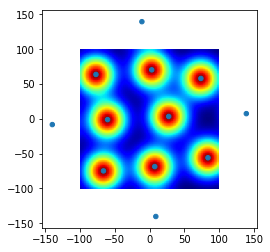

In [33]:
x_obs = rnodes
u_obs = peak_rate * np.ones(len(x_obs))
print u_obs.shape

from rbf.basis import *
r = get_r()
eps = get_eps()
ga_expr = sympy.exp(-(r/eps)**2)
ga = RBF(ga_expr)

ip1  = RBFInterpolant(x_obs, u_obs, sigma=0.1, phi=ga, eps=grid_spacing/2.71828, order=-1)

arena_x = np.arange(-100, 100, 1)
arena_y = np.arange(-100, 100, 1)

xx, yy = np.meshgrid(arena_x, arena_y)
coords = np.column_stack((xx.ravel(), yy.ravel()))
zz1 = ip1(coords)

plt.pcolor(xx, yy, zz1.reshape(xx.shape), cmap=cm.jet)
plt.scatter(x_obs[:,0], x_obs[:,1], u_obs, cmap=cm.jet)
ax = plt.gca()
ax.set_aspect('equal')